In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#converting the downloaded dataset from txt to dataframe
import pandas as pd
df=pd.read_csv("E:/GUVI Project - individual energy consumption/dataset/individual+household+electric+power+consumption/household_power_consumption.txt",sep=';',header=0)
#converting the dataframe to csv
df.to_csv('E:/GUVI Project - individual energy consumption/dataset/individual+household+electric+power+consumption/household_power_consumption.csv', index=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13840\3329443156.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("E:/GUVI Project - individual energy consumption/dataset/individual+household+electric+power+consumption/household_power_consumption.txt",sep=';',header=0)


In [3]:
# displaying first 10 rows
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [4]:
df.shape

(2075259, 9)

In [5]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
# # parsing date and time to single column
df['datetime']=(df['Date'] + ' ' + df['Time'])
df.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00


In [7]:
# # dropping date and time column
df=df.drop(['Date','Time'],axis=1)
df.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
 7   datetime               object 
dtypes: float64(1), object(7)
memory usage: 126.7+ MB


In [9]:
# # converting to datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'] ,format='%d/%m/%Y %H:%M:%S',errors='coerce')# errors='coerce' ensures that any invalid time entries are converted to NaT (Not a Time),

In [10]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [11]:
features=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
for i in features:
    print(df[i].value_counts())
    #replacing '?' string with Nan
    df[i] = df[i].replace('?', pd.NA)
    # Convert the column to float
    df[i] = pd.to_numeric(df[i], errors='coerce')


Global_active_power
?        25979
0.218     9491
0.216     9319
0.322     9226
0.324     9153
         ...  
4.96         1
5.428        1
5.33         1
4.366        1
5.084        1
Name: count, Length: 6534, dtype: int64
Global_reactive_power
0.000    472786
?         25979
0.100     21577
0.102     21473
0.098     21466
          ...  
0.834         1
0.708         1
0.77          1
0.84          1
0.632         1
Name: count, Length: 896, dtype: int64
Voltage
?          25979
241.180     3519
241.020     3251
241.120     3247
241.350     3231
           ...  
226.97         1
229.89         1
231.03         1
230.13         1
229.58         1
Name: count, Length: 5168, dtype: int64
Global_intensity
1.000    169406
1.400    160480
1.200    138153
1.600    115873
1.800     93189
          ...  
29.2          1
43.0          1
30.0          1
27.4          1
28.4          1
Name: count, Length: 377, dtype: int64
Sub_metering_1
0.000    1840611
1.000      82920
0.0        39564
?    

In [12]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [14]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
datetime                     0
dtype: int64

In [15]:
# Handing Nan values:
df=df.dropna()

In [16]:
df.shape

(2049280, 8)

In [17]:
# Cleaned dataset
df.to_csv('cleaned_dataset.csv')

In [18]:
import pandas as pd
df=pd.read_csv('E:/GUVI Project - individual energy consumption/cleaned_dataset.csv',index_col=0)

In [19]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [20]:
df['datetime'] = pd.to_datetime(df['datetime'] ,format='%Y-%m-%d %H:%M:%S',errors='coerce')# errors='coerce' ensures that any invalid time entries are converted to NaT (Not a Time),

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 140.7 MB


In [22]:
# # setting datetime as index
df1=df.copy()
df1.set_index('datetime', inplace=True)

In [23]:
df1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


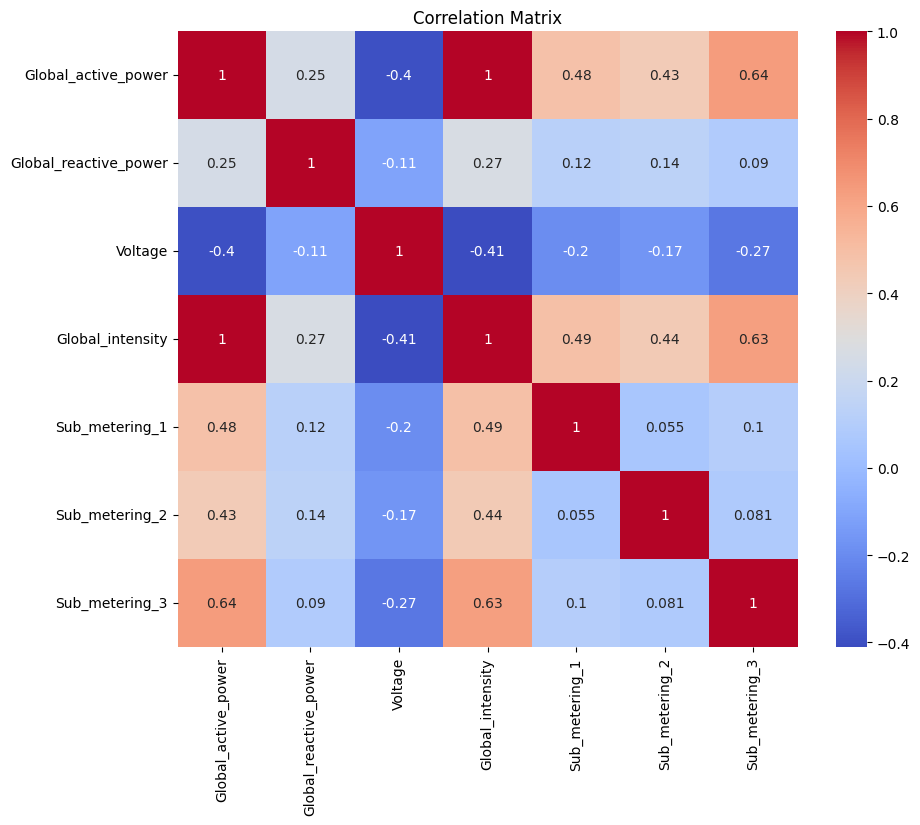

In [24]:
# correlation matrix
# corr=1--> maximum relation,corr=+ve--> positive relation, corr=-ve--> negatively correlated
import seaborn as sns
import matplotlib.pyplot as plt

corr = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

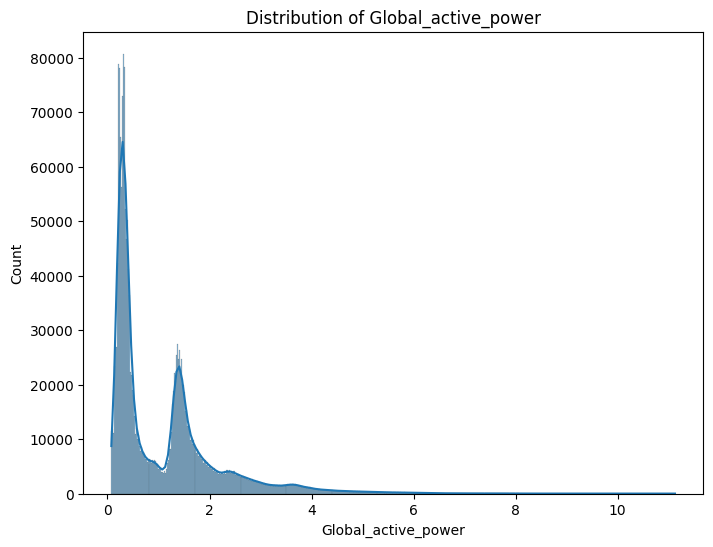

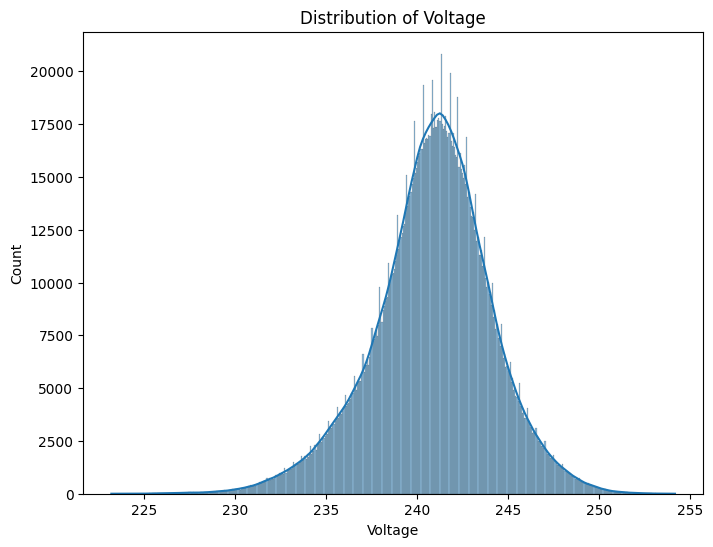

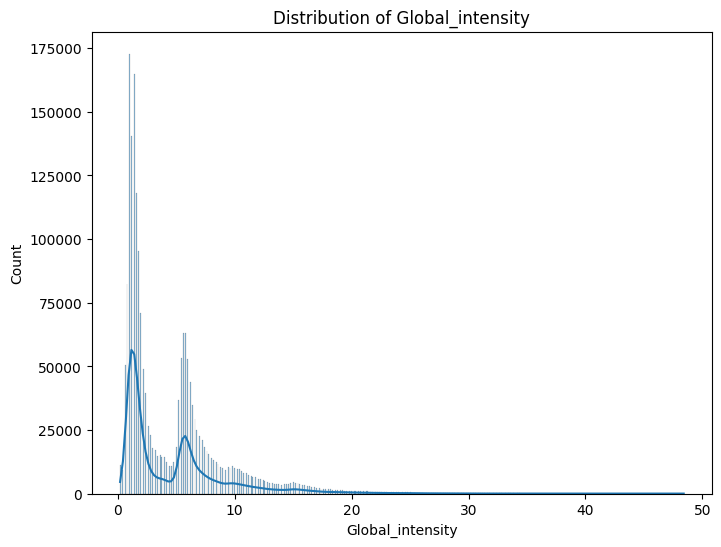

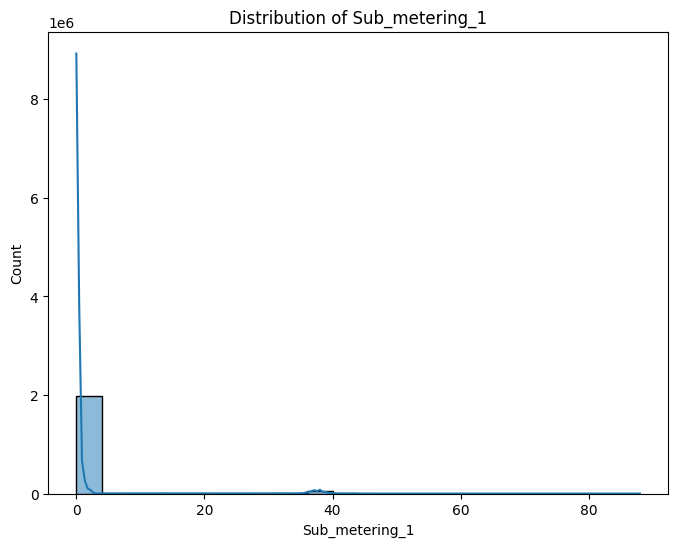

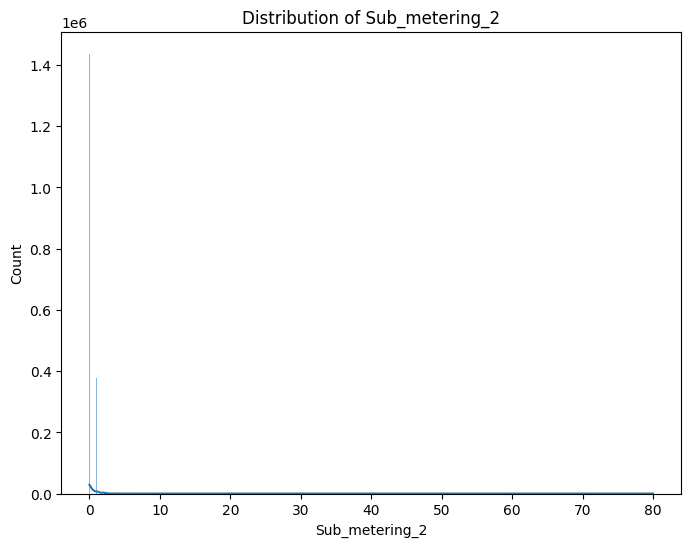

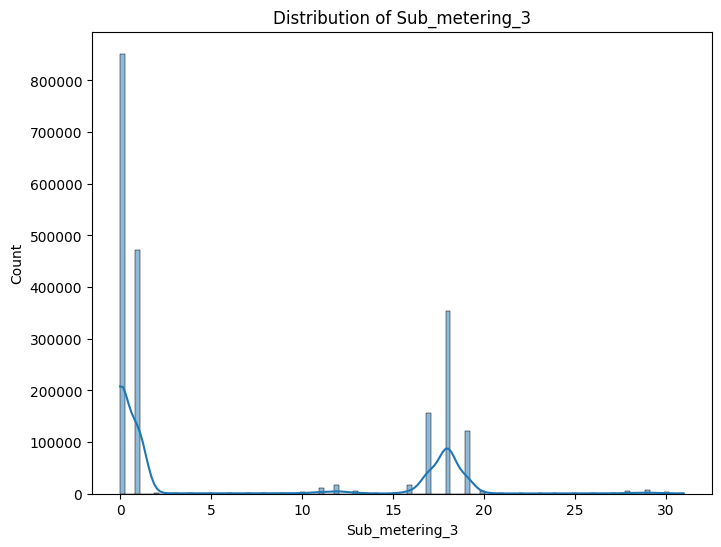

In [25]:
# to find the distribuion of the features
import matplotlib.pyplot as plt
columns=['Global_active_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
for i in columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df[i],kde=True)
    plt.title(f"Distribution of {i}")
    plt.show

In [26]:
# skewness and kurtosis
skewness = df['Global_active_power'].skew()
kurtosis = df['Global_active_power'].kurtosis()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Skewness:
# Positive - skewed towards right
# Negative - skewed towards left
# 0- symmetric distribution.

# kurtosis
# Kurtosis measures the "tailedness" of the distribution in terms of y axis
# A kurtosis of 3 (excess kurtosis of 0) indicates a normal distribution.
# Kurtosis > 3 indicates a distribution with heavier tails (leptokurtic).
# Kurtosis < 3 indicates a distribution with lighter tails (platykurtic).

Skewness: 1.7862333920915965
Kurtosis: 4.218685087072209


In [27]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
# Outlier detction using z-score
from scipy import stats
from scipy.stats import zscore

z_scores = stats.zscore(df['Global_active_power'])
outliers = df[abs(z_scores) > 3]
#print(outliers)
print(z_scores)

[ 2.95507706  4.03708463  4.05032598 ... -0.14529076 -0.149074
 -0.15096563]


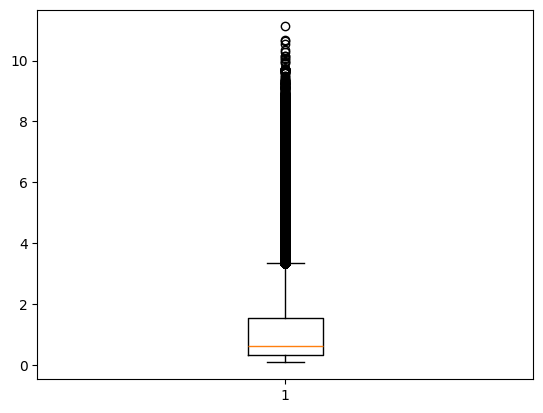

In [30]:
# plottig the outliers
import matplotlib.pyplot as plt
plt.boxplot(df['Global_active_power'])
plt.show()

In [31]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [32]:
# seperating the datetime to various new columns
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['date'] = df['datetime'].dt.day
df['Hour']=df['datetime'].dt.hour
df['Minute']=df['datetime'].dt.minute
df['Seconds']=df['datetime'].dt.second

In [33]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,Year,Month,date,Hour,Minute,Seconds
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25,0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26,0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27,0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0


In [34]:
#setting datetime as index
df.set_index('datetime', inplace=True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,date,Hour,Minute,Seconds
datetime,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24,0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25,0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26,0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27,0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58,0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59,0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0,0


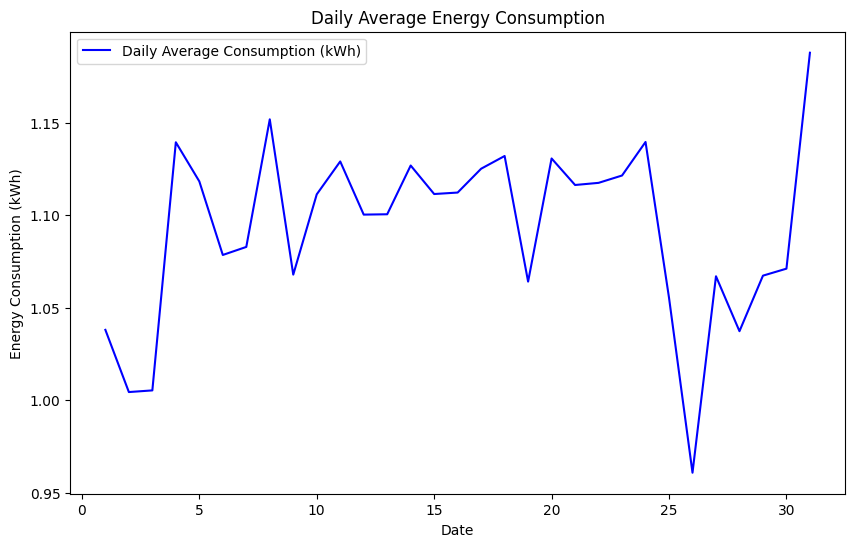

In [34]:
# finding daily average
daily_average=df.groupby(df['date'])['Global_active_power'].mean()
# print(daily_average)

import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot the daily average consumption using Seaborn
sns.lineplot(x=daily_average.index, y=daily_average, label='Daily Average Consumption (kWh)', color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Daily Average Energy Consumption')
plt.legend()
plt.show()

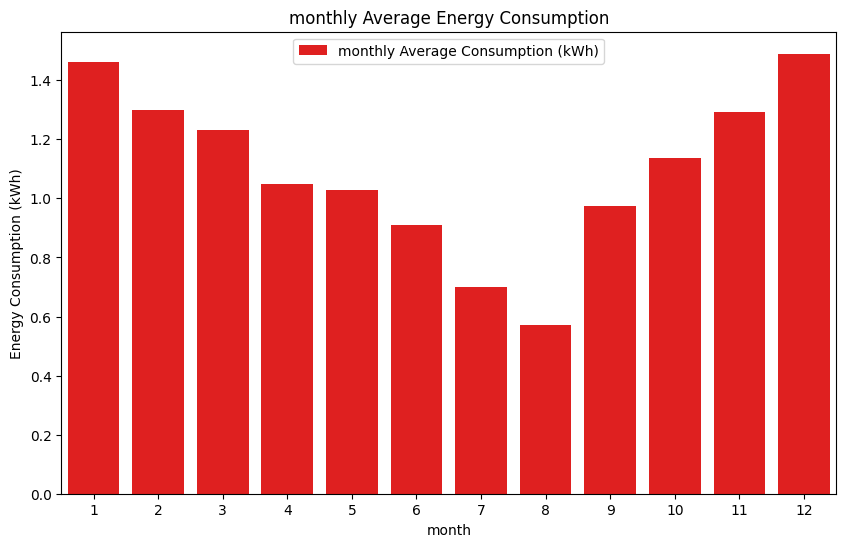

In [80]:
# finding monthly average
monthly_average=df.groupby(df['Month'])['Global_active_power'].mean()
# print(monthly_average)

import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot the monthly average consumption using Seaborn
sns.barplot(x=monthly_average.index, y=monthly_average, label='monthly Average Consumption (kWh)', color='red')

# Set labels and title
plt.xlabel('month')
plt.ylabel('Energy Consumption (kWh)')
plt.title('monthly Average Energy Consumption')
plt.legend()
plt.show()

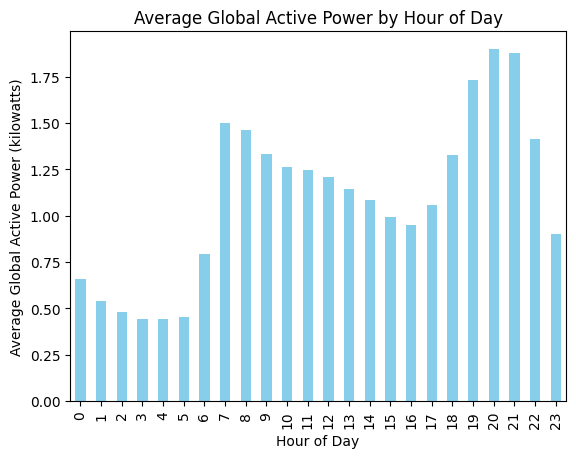

In [81]:
# finding peak hours
hourly_average=df.groupby(df['Hour'])['Global_active_power'].mean()
# print(hourly_average)
peak_hour=hourly_average.sort_values(ascending=False)
# print(peak_hour)

#plotting the hourly_average
import matplotlib.pyplot as plt
hourly_average.plot(kind='bar', color='skyblue')
plt.title('Average Global Active Power by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.show()

# insights found
# evening hours has more consumption may be due to evening activities at home.

In [36]:
# calculating rolling average for 7 days
df['7day_avg'] = df['Global_active_power'].rolling(window=7,min_periods=1).mean() #to avoid Nan values we are considering min_periods=1 (atleast one datapoint)

In [37]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,date,Hour,Minute,Seconds,7day_avg
datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24,0,4.216000
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25,0,4.788000
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26,0,4.983333
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27,0,5.084500
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28,0,4.800800


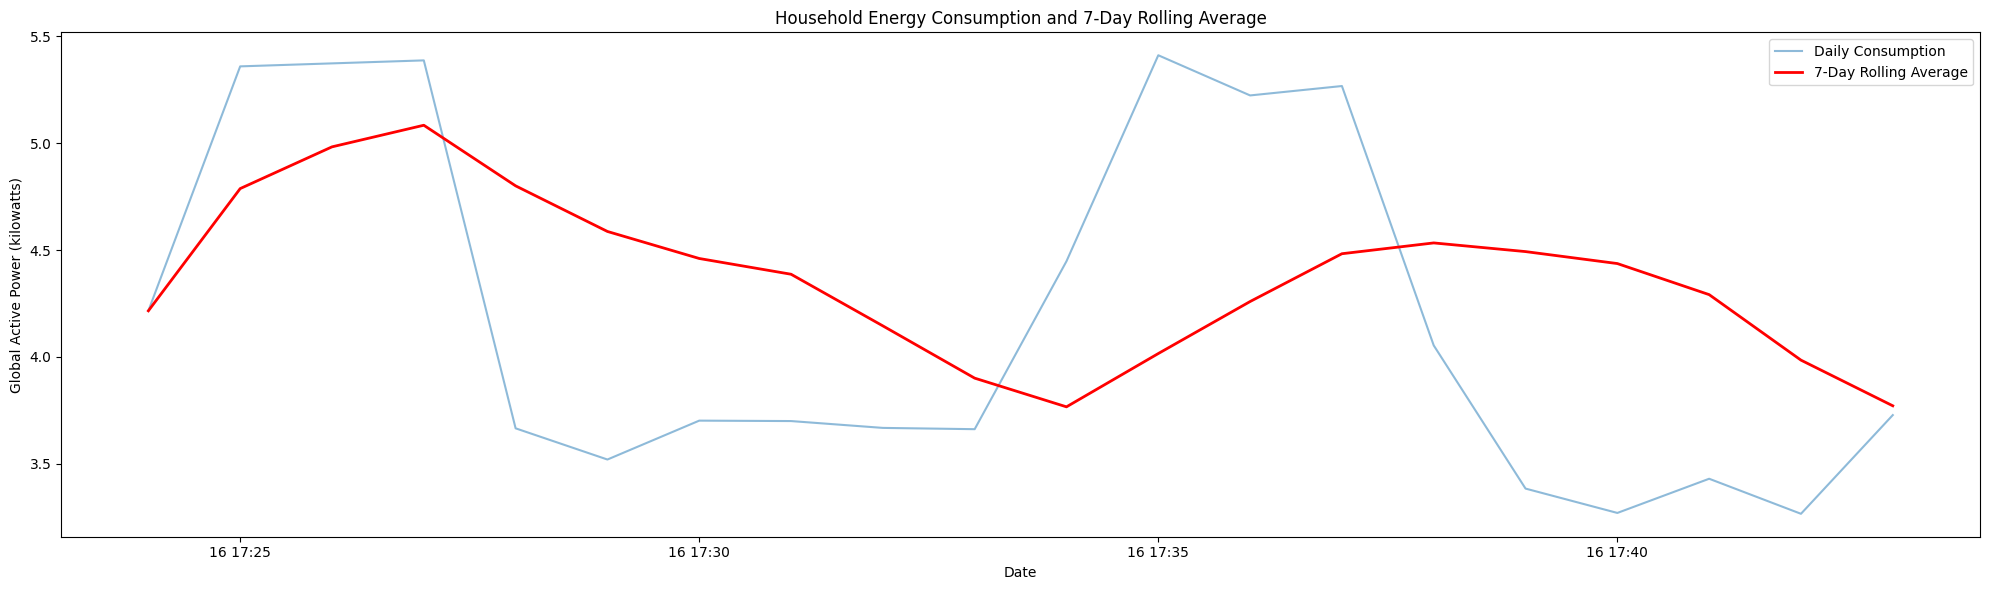

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(df.index[:20], df['Global_active_power'][:20], label='Daily Consumption', alpha=0.5)
plt.plot(df.index[:20], df['7day_avg'][:20], label='7-Day Rolling Average', color='red', linewidth=2)
plt.title('Household Energy Consumption and 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
pip install scikit-learn

In [54]:
# scaling
# standard scaler
from sklearn.preprocessing import StandardScaler
feature=['Global_active_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
df_scaled=df.copy()
df_scaled[feature]=StandardScaler().fit_transform(df[feature])

In [55]:
df_scaled.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,date,Hour,Minute,Seconds,7day_avg
datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,2.955077,0.418,-1.851816,3.098789,-0.182337,-0.051274,1.249421,2006,12,16,17,24,0,4.216
2006-12-16 17:25:00,4.037085,0.436,-2.225274,4.133800,-0.182337,-0.051274,1.130897,2006,12,16,17,25,0,4.788


In [56]:
#choosing the target
x=df_scaled.drop('Global_active_power',axis=1)
y=df_scaled['Global_active_power']

In [57]:
#splitting for testing and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [63]:
y_test.index

DatetimeIndex(['2010-07-09 08:10:00', '2008-05-08 13:13:00',
               '2007-07-06 01:55:00', '2007-07-05 08:43:00',
               '2009-02-07 20:56:00', '2007-02-16 10:39:00',
               '2007-05-03 06:16:00', '2009-08-24 18:40:00',
               '2008-01-22 03:03:00', '2010-04-30 20:21:00',
               ...
               '2010-04-16 05:41:00', '2007-08-28 06:58:00',
               '2008-12-30 02:28:00', '2009-07-15 21:44:00',
               '2010-04-09 07:26:00', '2008-08-28 15:03:00',
               '2010-10-26 02:19:00', '2010-09-13 03:38:00',
               '2008-04-12 21:29:00', '2009-05-30 05:45:00'],
              dtype='datetime64[ns]', name='datetime', length=614784, freq=None)

In [58]:
# training the model
# Random forest regressor

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50,max_depth=10,random_state=1).fit(x_train,y_train)
y_predict=model.predict(x_test)

In [59]:
#evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("RandomForestRegressor Metrics")
print(f'MAE:' ,mean_absolute_error(y_test,y_predict))
print(f'RMSE:',mean_squared_error(y_test,y_predict))
print(f'R2 score:',r2_score(y_test,y_predict))

RandomForestRegressor Metrics
MAE: 0.018225052773909955
RMSE: 0.001000836646448927
R2 score: 0.9990017257870925


In [67]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train,y_train)
y_predict_LR=model.predict(x_test)

#Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Linear Regression Metrics")
print(f'MAE:' ,mean_absolute_error(y_test,y_predict_LR))
print(f'RMSE:',mean_squared_error(y_test,y_predict_LR))
print(f'R2 score:',r2_score(y_test,y_predict_LR))


Linear Regression Metrics
MAE: 0.024159250765714207
RMSE: 0.0014406890305681745
R2 score: 0.9985629995532859


In [68]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=100,random_state=1,learning_rate=0.1,).fit(x_train,y_train)
y_predict_GB=model.predict(x_test)

In [69]:
#Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Gradient boosting  Metrics")
print(f'MAE:' ,mean_absolute_error(y_test,y_predict_GB))
print(f'RMSE:',mean_squared_error(y_test,y_predict_GB))
print(f'R2 score:',r2_score(y_test,y_predict_GB))

Gradient boosting  Metrics
MAE: 0.01946039769014856
RMSE: 0.0009916420555253803
R2 score: 0.9990108968371831


In [ ]:
# model comparision
# lowest RMSE and hihgest R2 usually indicates the best model
# Gradient boosting is the best

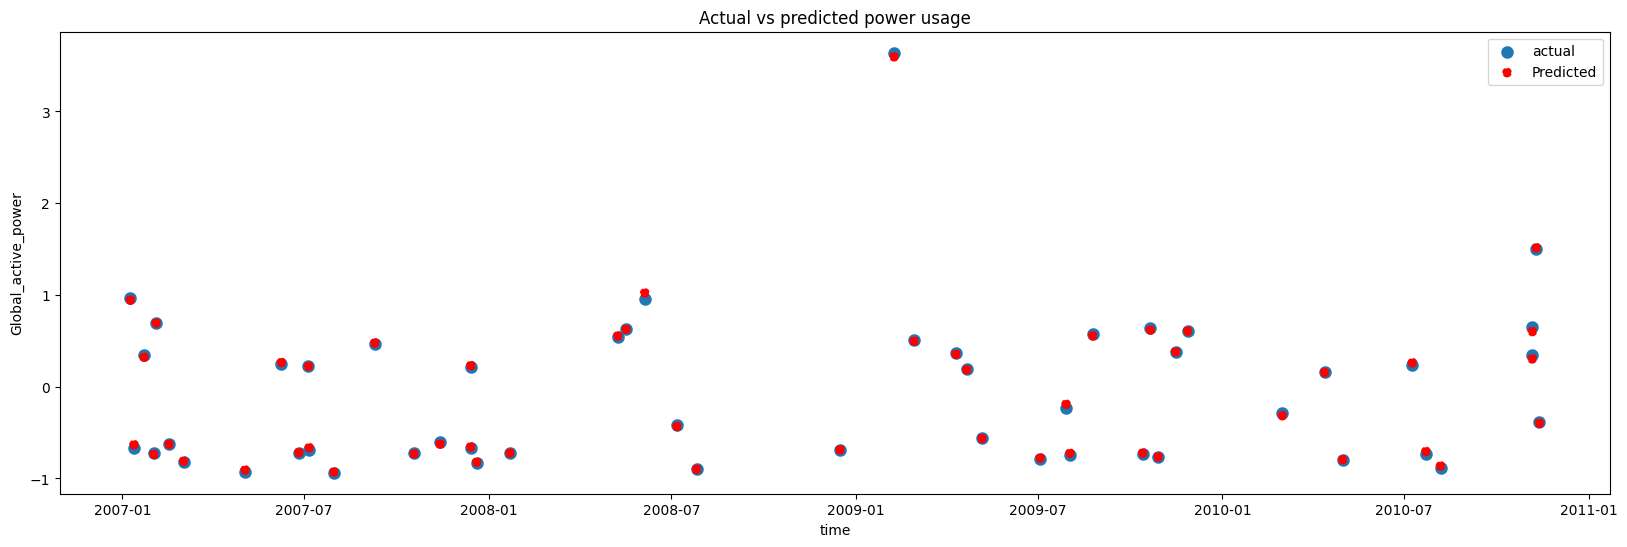

In [84]:
# plotting the best fit model Actual vs predicted power usage
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.scatter(y_test.index[:50],y_test[:50],label='actual',linewidth=3)
plt.scatter(y_test.index[:50],y_predict_GB[:50],label='Predicted',linestyle='--',color='red')
plt.title('Actual vs predicted power usage')
plt.xlabel('time')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()